 
<h1 style="text-align: center;"><span style="color: #333399;">Unsupervised Sentiment Analysis: Practice using varying techniques, packages, and APIs </span></h1>
<h6 style="text-align: center;">Created by: Michael Gagliano on 9/12/2018</h6>
<h6 style="text-align: center;">"K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.</h6>

# Understanding Sentiment Analysis

<p style="text-align: center;">Before we dive in, it helps to understand one of the key elements of Unsupervised Sentiment Analysis:</p>
<p style="text-align: left;"><strong>Lexicon:</strong> A&nbsp;lexicon is a collection of words mapped to a certain score (sometimes called polarity) based on it's connotation of use. We use a lexicon in <em>unsupervised&nbsp;</em>Sentiment Analysis as we are not using data to train a model, and/or when we are dealing with data from various domains.</p>


<b>Importing the  necessary packages</b>

In [1]:
from pattern.en import sentiment #Will be using Pattern package for sentiment analysis
import csv #Allows us to pull in CSV data and one of the Sentiment Lexicons to be used (Bing-Liu's)
import pandas as pd #Allows for efficient and deep data manipulation
import re #Allows regular expression be used in the data pre-processing 

import nltk #Natural Language Text proccesing package 
from nltk.corpus import stopwords

import matplotlib.pyplot as plt #Data visualization package
%matplotlib inline


In [2]:
from os import path
from wordcloud import WordCloud, STOPWORDS #Data visualization package

In [3]:
openfile = open("data/hw_sentimentanalysis.csv", "rt")
r = csv.reader(openfile)
sa = []
for i in r:
    sa.append(i)
openfile.close()

#The line of code below this can be run to confirm proper loading of the data
sa[:2]

[['text'],
 ["I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."]]

The data is now contained in a nested list structure. A list of contained reviews of text str() data.

In [4]:
#remove the extra bracket to un-nest the list
# See: https://docs.python.org/3.3/tutorial/datastructures.html#list-comprehensions

sa = [i[0] for i in sa]

#also sa = [x for y in sa for x in y]

The data is now just contained in a single list of text data (reviews). Each item in the list represents a review, and through additonal pre-processing, we are now ready to begin performing varying sentiment analysis techniques.

In [5]:
# Using the Regular Expression package to effciently filter out any non-alphanumeric wrods
sa_cleanv1 = [re.sub("[^a-zA-Z]+", " ", document) for document in sa]
# Tokenizing; Breaking each element (word) of the sentence into it's own object within each sentence
sa_token = [[word for word in document.lower().split() ] for document in sa_cleanv1]

Previewing the data below to confirm it was properly tokenized

In [6]:
for sentence in sa_token[:2]:
    print(sentence)

['text']
['i', 'went', 'and', 'saw', 'this', 'movie', 'last', 'night', 'after', 'being', 'coaxed', 'to', 'by', 'a', 'few', 'friends', 'of', 'mine', 'i', 'll', 'admit', 'that', 'i', 'was', 'reluctant', 'to', 'see', 'it', 'because', 'from', 'what', 'i', 'knew', 'of', 'ashton', 'kutcher', 'he', 'was', 'only', 'able', 'to', 'do', 'comedy', 'i', 'was', 'wrong', 'kutcher', 'played', 'the', 'character', 'of', 'jake', 'fischer', 'very', 'well', 'and', 'kevin', 'costner', 'played', 'ben', 'randall', 'with', 'such', 'professionalism', 'the', 'sign', 'of', 'a', 'good', 'movie', 'is', 'that', 'it', 'can', 'toy', 'with', 'our', 'emotions', 'this', 'one', 'did', 'exactly', 'that', 'the', 'entire', 'theater', 'which', 'was', 'sold', 'out', 'was', 'overcome', 'by', 'laughter', 'during', 'the', 'first', 'half', 'of', 'the', 'movie', 'and', 'were', 'moved', 'to', 'tears', 'during', 'the', 'second', 'half', 'while', 'exiting', 'the', 'theater', 'i', 'not', 'only', 'saw', 'many', 'women', 'in', 'tears', '

# 1. Using Bing-Liu's Lexicon (Positive-Negative)

In [7]:
#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "rt").read().splitlines()
negative_words = open("data/negative-words.txt", "rt").read().splitlines()

In [8]:
#Creating 3 separate 'bucket' empty lists to collect the sentences that meet the parameters defined
positive_review = [] 
negative_review = []
neutral_review = []

for sentence in sa_token: #For each sentence(review) in the dataset
    positive = 0
    negative = 0
    for word in sentence: #Look at each word in the sentence and then
        if word in positive_words:
            positive += 1 #Add one to positive count if the word in the sentence is positive per Bing Liu Lexicon
        elif word in negative_words: #If not, then
            negative += 1 #Add one to negative count if word in sentence is negative per Bing Liu Lexicon
    if positive-negative > 0: #If the sum of postive-negative words is greater than 0
        positive_review.append(sentence) #Add the sentence to the positive review list
    elif positive-negative == 0: #If not, check if the difference between positive and negative words are 0
        neutral_review.append(sentence) #If they are, add the review to the neutral review column
    else: #Otherwise, it is a negative review and will be assigned the negative review list
        negative_review.append(sentence)

Let's now examine how many reviews are in each category

## The total number of Positive, Negative, and Neutral reviews using Bing Liu's Lexicon - respectively

In [9]:
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

69
28
10


In [10]:
#Removing the extra brackets for the nested lists of reviews in the positive and negative categories

posrev_tokens = [x for y in positive_review for x in y]
negrev_tokens = [x for y in negative_review for x in y]

In [11]:
#Testing
posrev_tokens[:10]

['i', 'went', 'and', 'saw', 'this', 'movie', 'last', 'night', 'after', 'being']

In [12]:
# remove common words 
stoplist = stopwords.words('english')

# I set the same additional stopwords for both lists to avoid any intentional/unintentional bias,
# mainly removing adjectives and prepositions

more = set(['the', 'text', 'from', 'see', 'one', 'like', 'well', 'would', 'there',
            'really', 'very', 'even', 'ever', 'seen', 'could', 'got', 'much',
            'many', 'way', 'made', 'get', 'dvd', 'watch', 'movie', 'film'])

stoplist = set(stoplist) | more 
posrev_tokens_cl = [[word for word in text if word not in stoplist] for text in positive_review]
negrev_tokens_cl = [[word for word in text if word not in stoplist] for text in negative_review]
#remove short words
posrev_tokens_cl = [[word for word in tokens if len(word) >= 3 ] for tokens in posrev_tokens_cl]
negrev_tokens_cl = [[word for word in tokens if len(word) >= 3 ] for tokens in negrev_tokens_cl]

#Removing nested list
posrev_tokens_cl = [x for y in posrev_tokens_cl for x in y]
negrev_tokens_cl = [x for y in negrev_tokens_cl for x in y]

## Counting the word frequency in the positive and negative reviews

In [13]:
posrev_tokens_cl[:10]

['went',
 'saw',
 'last',
 'night',
 'coaxed',
 'friends',
 'mine',
 'admit',
 'reluctant',
 'knew']

In [14]:
from collections import Counter

posrev_wc = Counter(posrev_tokens_cl)
negrev_wc = Counter(negrev_tokens_cl)

print(posrev_wc.most_common(10))
print(negrev_wc.most_common(10))


[('great', 44), ('story', 30), ('characters', 27), ('good', 25), ('time', 20), ('julie', 19), ('nanny', 18), ('character', 17), ('little', 17), ('also', 17)]
[('people', 13), ('good', 9), ('little', 8), ('make', 8), ('acting', 8), ('bad', 7), ('two', 7), ('time', 7), ('scenes', 7), ('killer', 7)]


### Creating a wordcloud for the top 20 most common words found in both positive and negative reviews, each.

(-0.5, 399.5, 199.5, -0.5)

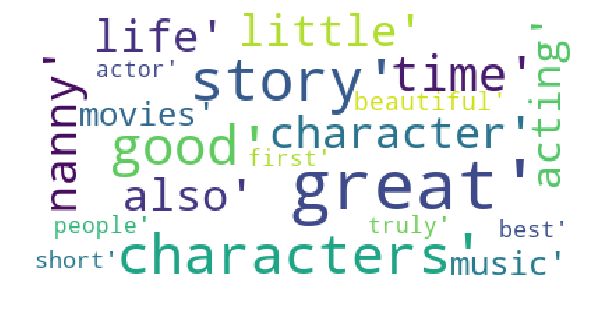

In [15]:
from os import path
from wordcloud import WordCloud, STOPWORDS

# Technically not necessary to import STOPWORDS, as we already cleaned for
# the stopwords earlier in the tokenized lists from earlier. 

import matplotlib.pyplot as plt
%matplotlib inline

pos = str(posrev_tokens_cl) 


# take relative word frequencies into account, lower max_font_size
wordcloud1 = WordCloud(background_color="white", max_words=20, max_font_size=50, relative_scaling=.5).generate(pos)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud1)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

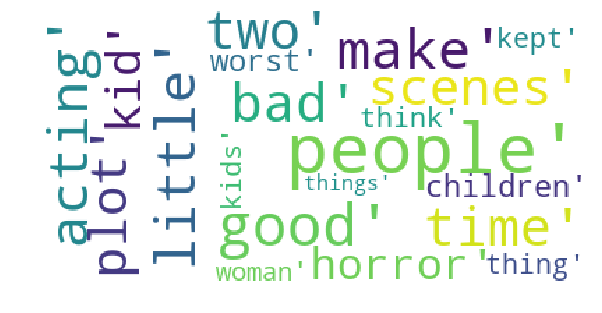

In [16]:
neg = str(negrev_tokens_cl) 

wordcloud2 = WordCloud(background_color="white", max_words=20, max_font_size=50, relative_scaling=.5).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis("off")

In [17]:
df_pos = pd.DataFrame(posrev_wc.most_common()).rename(columns={0 : 'Word', 1 : 'Pos_Freq'})
df_neg = pd.DataFrame(negrev_wc.most_common()).rename(columns={0 : 'Word', 1 : 'Neg_Freq'})


df_merged = df_pos.merge(df_neg, how='outer').fillna(0)
df_merged['Count'] = df_merged['Neg_Freq'] + df_merged['Pos_Freq']
df_merged.head(10) #BOOM WE DID IT.

,Word,Pos_Freq,Neg_Freq,Count
0,great,44.0,2.0,46.0
1,story,30.0,4.0,34.0
2,characters,27.0,3.0,30.0
3,good,25.0,9.0,34.0
4,time,20.0,7.0,27.0
5,julie,19.0,1.0,20.0
6,nanny,18.0,0.0,18.0
7,character,17.0,3.0,20.0
8,little,17.0,8.0,25.0
9,also,17.0,1.0,18.0


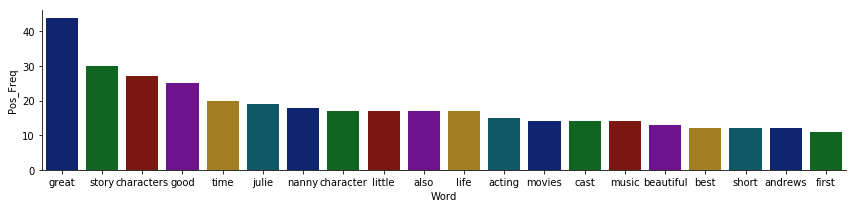

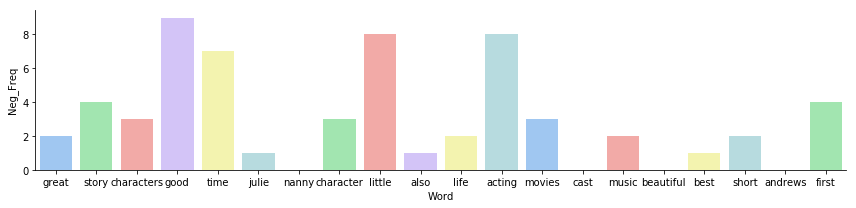

In [18]:
import seaborn as sns

#ax = sns.barplot("Word", "Pos_Freq", data=df_merged, palette="terrain")

sns.factorplot("Word", "Pos_Freq", kind="bar", data=df_merged.head(20), palette="dark", size = 3, aspect = 4)
sns.factorplot("Word", "Neg_Freq", kind="bar", data=df_merged.head(20), palette="pastel", size = 3, aspect = 4)

#Top Plot is Positive Review Word Frequency for Top 20 Words
#Bottom Plot is Negative Review Word Frequency for Top 20 Words

## The Positive Review sentiment analysis shows that the most common words were typically emotional (i.e. 'good', 'great') and praised the elements of the movie like characters and story. The Negative Review sentiment analysis shows that the reviews were more centered around the acting.

# 2. Using Pattern Package for Sentiment Analysis

In [19]:
from pattern.en import sentiment

In [20]:
pattern_rev = []
openfile = open('data/hw_sentimentanalysis.csv', 'rt')
r = csv.reader(openfile)
for i in r:
    pattern_rev.append(i)  
openfile.close()

In [21]:
#Counting number of objects (reviews) are in the stored list
len(pattern_rev)

107

In [22]:
pattern_rev = [x for y in pattern_rev for x in y]
# Remove useless numbers and alphanumerical words
doc = [re.sub("[^a-zA-Z]+", " ", document) for document in pattern_rev]
# tokenize
pattern_tokens = [[word for word in document.lower().split() ] for document in doc]
# remove common words 

#Using stoplist from earlier, still. Same wordset, different package analysis

pattern_tokens = [[word for word in text if word not in stoplist] for text in pattern_tokens]
#remove short words
pattern_tokens = [[ word for word in tokens if len(word) >= 3 ] for tokens in pattern_tokens]
pattern_tokens

[[],
 ['went',
  'saw',
  'last',
  'night',
  'coaxed',
  'friends',
  'mine',
  'admit',
  'reluctant',
  'knew',
  'ashton',
  'kutcher',
  'able',
  'comedy',
  'wrong',
  'kutcher',
  'played',
  'character',
  'jake',
  'fischer',
  'kevin',
  'costner',
  'played',
  'ben',
  'randall',
  'professionalism',
  'sign',
  'good',
  'toy',
  'emotions',
  'exactly',
  'entire',
  'theater',
  'sold',
  'overcome',
  'laughter',
  'first',
  'half',
  'moved',
  'tears',
  'second',
  'half',
  'exiting',
  'theater',
  'saw',
  'women',
  'tears',
  'full',
  'grown',
  'men',
  'trying',
  'desperately',
  'let',
  'anyone',
  'crying',
  'great',
  'suggest',
  'judge'],
 ['costner',
  'dragged',
  'far',
  'longer',
  'necessary',
  'aside',
  'terrific',
  'sea',
  'rescue',
  'sequences',
  'care',
  'characters',
  'ghosts',
  'closet',
  'costner',
  'character',
  'realized',
  'early',
  'forgotten',
  'later',
  'time',
  'care',
  'character',
  'care',
  'cocky',
  'over

In [23]:
positive_review = []
negative_review = []
neutral_review = []

for row in pattern_tokens:
    review = row
    score = sentiment(review)
    if score[0] > 0:
        positive_review.append(review)
    elif score[0] == 0:
        neutral_review.append(review)
    else:
        negative_review.append(review)

## The Postive, Negative, and Neutral reviews using Pattern - respectively:

In [24]:
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

81
25
1


This shows that Pattern has a stronger degree polarity than the Bing Liu Lexicon method. It may or may not be better depending on the type or range of reviews you are hoping/seeking to find; Pattern is likely best to determine a more polarizing calculation than Bing Liu's more general polarity-scoring Lexicon.

# Using NLTK's Lexicon's; The Vader Lexicon - to perform Sentiment Analysis

In [25]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [26]:
nltk_results = [nltk_sentiment(row) for row in sa_cleanv1]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(sa_cleanv1, columns = ['text'])
nltk_df = text_df.join(results_df)
nltk_df.head(10)

C:\Users\Mike Gagliano\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,text,compound,neg,neu,pos
0,text,0.0000,0.000,1.000,0.000
1,I went and saw this movie last night after bei...,0.7956,0.085,0.775,0.140
2,Once again Mr Costner has dragged out a movie ...,-0.5349,0.144,0.756,0.100
3,The finest short I ve ever seen Some commentat...,0.9818,0.071,0.727,0.202
4,If you had asked me how the movie was througho...,0.9500,0.054,0.772,0.174
5,An obvious vanity press for Julie in her first...,0.9175,0.118,0.685,0.197
6,I work at a movie theater and every Thursday n...,0.9707,0.027,0.821,0.152
7,Some may go for a film like this but I most as...,-0.0027,0.147,0.694,0.159
8,For years I ve been a big fan of Park s work a...,-0.6104,0.161,0.712,0.127
9,Might end up being the biggest disappointment ...,0.9575,0.090,0.726,0.184


In [27]:
pos_review = 0
neg_review = 0
neu_review = 0

for score in nltk_df['compound']: #Compound is the overall score
    if score > 0:
        pos_review += 1
    elif score == 0:
        neu_review += 1
    else:
        neg_review += 1

## The count of Positive, Negative, and Neutral reviews using the Vader Lexicon - respectivelty:

In [28]:
print(pos_review)
print(neg_review)
print(neu_review)

80
25
2


# There are 80 Positive Reviews, 25 Negative Reviews, and 2 Neutral reviews using The Vader Lexicon from NLTK's Repository

# #4 Using MonkeyLearn API service for Sentiment Analysis

In [29]:
from monkeylearn import MonkeyLearn

ml = MonkeyLearn('a6977371926c7cb909a4ca7b697a5a3fbd9766f0')
data = sa_cleanv1
model_id = 'cl_pi3C7JiL'
result = ml.classifiers.classify(model_id, data)

PlanQueryLimitError: Error PLAN_QUERY_LIMIT: Request Throttled. You do not have enough queries left to perform this action. 107 queries are required, but you have 84 queries remaining.

In [ ]:
from monkeylearn import MonkeyLearn

ml = MonkeyLearn('a6977371926c7cb909a4ca7b697a5a3fbd9766f0')
data = sa_cleanv1
result = ml.classifiers.classify(model_id, data)
print(result.body)

In [ ]:
dfml = pd.DataFrame(result.body)
dfml.to_csv('monkeylearn_sentanalysis.csv')
dfml.head(3)

I ran into some issues when using the MonkeyLearn API/ They capped the query limit so when I ran the data through the API more than once, I could no longer analyze it using the free version. I converted the data into a Pandas dataframe and then analyzed the outcome of the data using google sheets

## There are 60 Positive Reviews from the MonkeyLearn Movie Sentiment API
## There are 44 Negative Reviews from the MonkeyLearn Movie Sentiment API</b></br>
## There are 3 Neutral Reviews from the MonkeyLearn Movie Sentiment API</b></br>


# 5. Closing Remarks

Going forward, I would likely use an API service such as MonkeyLearn or Aylien to perform Unsupervised Sentiment Analysis. The packages will be better tailored to the words and the "weight" of the polarity will be more accurate. SpaCy seems like an incredibly portable package to use as well when it comes to integrating SciKit to train on. 